<a href="https://www.kaggle.com/code/sejalhanmante/loan-prediction-project-sejal?scriptVersionId=184750138" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
loan_df = pd.read_csv(r"/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv")
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#  Data Preprocessing

**Handling missing values**

In [3]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
loan_df["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [5]:
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**Filiing categorical null values**

In [6]:

loan_df["Gender"].fillna(loan_df["Gender"].mode()[0],inplace=True)
loan_df["Married"].fillna(loan_df["Married"].mode()[0],inplace=True)
loan_df["Self_Employed"].fillna(loan_df["Self_Employed"].mode()[0],inplace=True)
loan_df["Dependents"].fillna(loan_df["Dependents"].mode()[0],inplace=True)

/tmp/ipykernel_18/3900876583.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df["Gender"].fillna(loan_df["Gender"].mode()[0],inplace=True)
/tmp/ipykernel_18/3900876583.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [7]:
loan_df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Filling numerical null values**

In [8]:
loan_df["Credit_History"].unique()

array([ 1.,  0., nan])

In [9]:

loan_df["LoanAmount"].fillna(loan_df["LoanAmount"].mean(),inplace=True)
loan_df["Loan_Amount_Term"].fillna(loan_df["Loan_Amount_Term"].mean(),inplace=True)
loan_df["Credit_History"].fillna(loan_df["Credit_History"].mode()[0],inplace=True)


/tmp/ipykernel_18/2381043641.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df["LoanAmount"].fillna(loan_df["LoanAmount"].mean(),inplace=True)
/tmp/ipykernel_18/2381043641.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [10]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


**Removing unnecessary columns**

In [12]:
#loan_df.drop(["Loan_ID"],axis=1)

In [13]:
print(loan_df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]].describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.412162        342.000000   
std        6109.041673        2926.248369   84.037468         64.372489   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


# DATA VISUALIZATION

In [14]:
loan_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


**Loan_status accepted vs rejected count**

Text(0.5, 1.0, 'Loan Status Count')

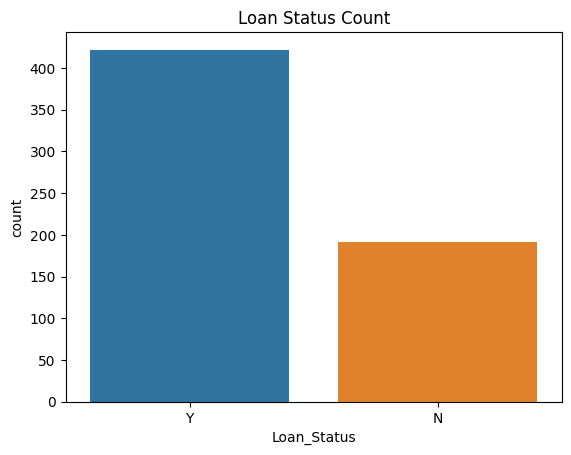

In [15]:
sns.countplot(loan_df,x="Loan_Status").set_title("Loan Status Count")


**Loan status approved according to gender**





In [16]:
approved = loan_df[loan_df["Loan_Status"]=="Y"]["Gender"].value_counts()
approved

Gender
Male      347
Female     75
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7ae92b381ff0>,
 [Text(-0.9329492937848545, 0.5827569092051519, 'Male'),
  Text(0.9329492665040333, -0.5827569528796601, 'Female')],
 [Text(-0.5088814329735569, 0.31786740502099187, '82.2%'),
  Text(0.508881418093109, -0.3178674288434509, '17.8%')])

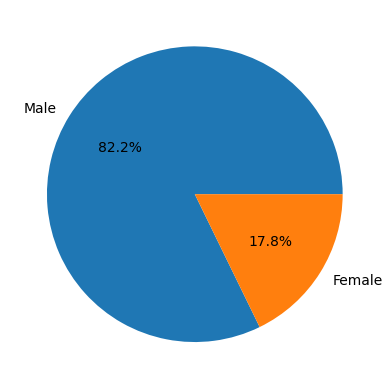

In [17]:
plt.pie(approved,labels=approved.index, autopct="%1.1f%%")

In [18]:
rejected = loan_df[loan_df["Loan_Status"]=="N"]["Gender"].value_counts()
rejected

Gender
Male      155
Female     37
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7ae92bb12860>,
 [Text(-0.9044950799629518, 0.6260101040101619, 'Male'),
  Text(0.9044951092685987, -0.6260100616676908, 'Female')],
 [Text(-0.4933609527070645, 0.34146005673281554, '80.7%'),
  Text(0.49336096869196283, -0.3414600336369222, '19.3%')])

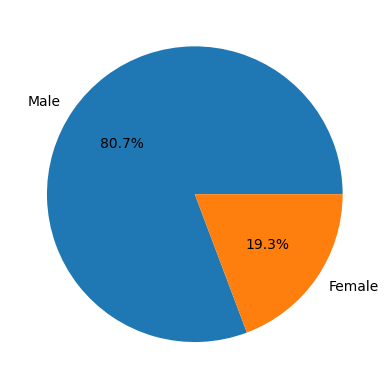

In [19]:
plt.pie(rejected,labels=approved.index, autopct="%1.1f%%")

In [20]:
loan_df['Credit_History'].unique()

array([1., 0.])

In [21]:
incomevsacc=loan_df.groupby("Loan_Status")[["ApplicantIncome","CoapplicantIncome"]].mean()
incomevsacc

,ApplicantIncome,CoapplicantIncome
Loan_Status,,
N,5446.078125,1877.807292
Y,5384.068720,1504.516398


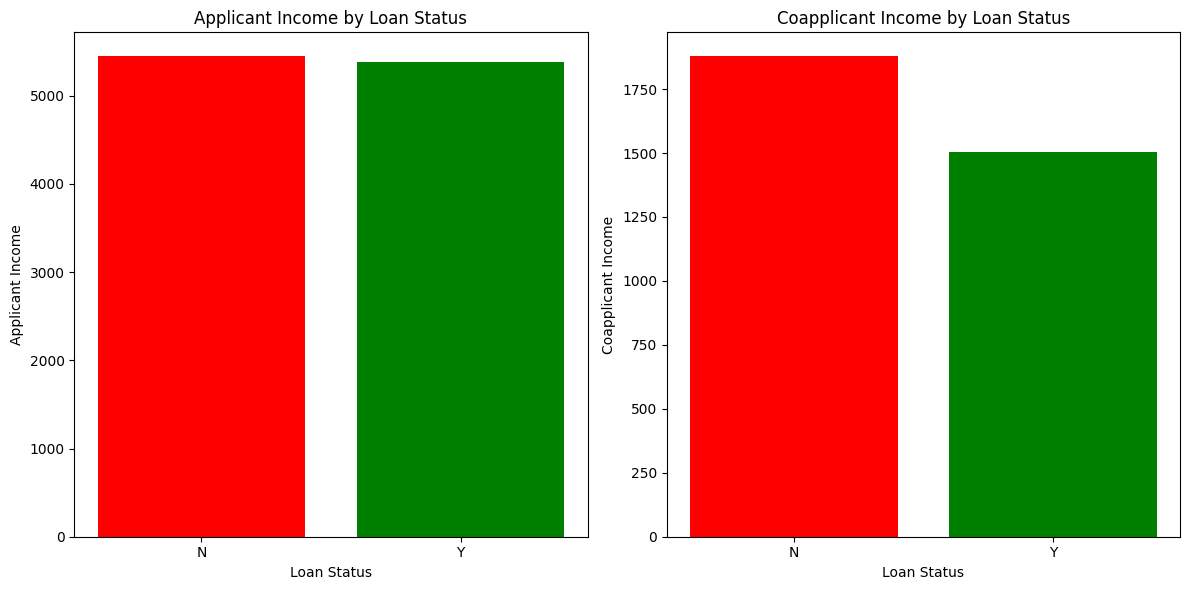

In [22]:
# Plot income vs loan status using subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Applicant income
ax1.bar(incomevsacc.index, incomevsacc["ApplicantIncome"], color=['green' if status == 'Y' else 'red' for status in incomevsacc.index])
ax1.set_title("Applicant Income by Loan Status")
ax1.set_xlabel("Loan Status")
ax1.set_ylabel("Applicant Income")

# Coapplicant income
ax2.bar(incomevsacc.index, incomevsacc["CoapplicantIncome"], color=['green' if status == 'Y' else 'red' for status in incomevsacc.index])
ax2.set_title("Coapplicant Income by Loan Status")
ax2.set_xlabel("Loan Status")
ax2.set_ylabel("Coapplicant Income")

plt.tight_layout()
plt.show()

**Marital Status Distribution**

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


<Axes: >

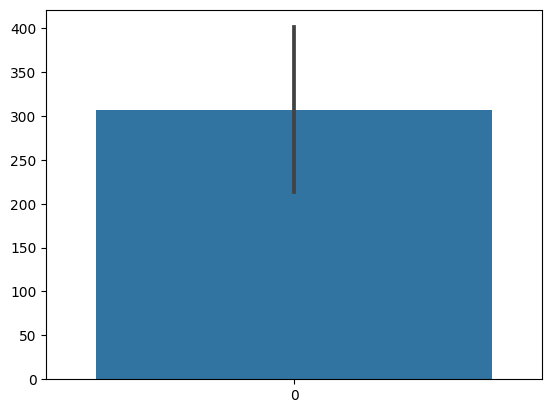

In [23]:
married_count = loan_df["Married"].value_counts()
married_count
sns.barplot(data = married_count)

**Loan Status vs Credit history**

In [24]:
loan_df['Credit_History'].values

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1.

In [25]:
px.histogram(loan_df, x='Credit_History', color='Loan_Status',barmode="group",title='Loan_Status vs Credit_His')
# fig_credit_history.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


**ONE-HOT ENCODING**

In [26]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [28]:
loan_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [29]:
x=pd.get_dummies(loan_df[['Gender', 'Married', 'Education', 'Self_Employed','Property_Area']],columns=['Gender', 'Married', 'Education', 'Self_Employed','Property_Area'])
#x.columns=['Male','Female', 'UnMarried',"Married", 'Graduate',"Not_Graduate" ,'Self_Employed_no',"Self_Employed_yes","Rural","SemiUrban","Urban" ,"Approved","Unapproved"]
x

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,False,True,True,False,True,False,True,False,False,False,True
1,False,True,False,True,True,False,True,False,True,False,False
2,False,True,False,True,True,False,False,True,False,False,True
3,False,True,False,True,False,True,True,False,False,False,True
4,False,True,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
609,True,False,True,False,True,False,True,False,True,False,False
610,False,True,False,True,True,False,True,False,True,False,False
611,False,True,False,True,True,False,True,False,False,False,True
612,False,True,False,True,True,False,True,False,False,False,True


In [30]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [31]:
a=loan_df[["ApplicantIncome","CoapplicantIncome","LoanAmount",	"Loan_Amount_Term"	,"Credit_History","Loan_Status"]]
x =pd.merge(a, x,left_index=True,right_index=True)
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,Y,False,True,True,False,True,False,True,False,False,False,True
1,4583,1508.0,128.000000,360.0,1.0,N,False,True,False,True,True,False,True,False,True,False,False
2,3000,0.0,66.000000,360.0,1.0,Y,False,True,False,True,True,False,False,True,False,False,True
3,2583,2358.0,120.000000,360.0,1.0,Y,False,True,False,True,False,True,True,False,False,False,True
4,6000,0.0,141.000000,360.0,1.0,Y,False,True,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,Y,True,False,True,False,True,False,True,False,True,False,False
610,4106,0.0,40.000000,180.0,1.0,Y,False,True,False,True,True,False,True,False,True,False,False
611,8072,240.0,253.000000,360.0,1.0,Y,False,True,False,True,True,False,True,False,False,False,True
612,7583,0.0,187.000000,360.0,1.0,Y,False,True,False,True,True,False,True,False,False,False,True


In [32]:
from sklearn.preprocessing import OneHotEncoder
enc= OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(loan_df[['Gender', 'Married', 'Education', 'Self_Employed','Property_Area', 'Loan_Status']]).toarray())
enc_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
610,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
611,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
612,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


**Model Development**





In [33]:
#loan_df.drop(["Loan_ID"],axis=1,inplace=True)
x.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [34]:
X = x.drop(['Loan_Status'],axis=1)
y = x['Loan_Status']


In [35]:
X.shape , y.shape

((614, 16), (614,))

**Train-Test-Split**

In [36]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size= 0.2,random_state=42)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((491, 16), (491,), (123, 16), (123,))

**Model Development**

**Random Forest**

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150,max_depth=3,n_jobs=-1)
rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=3, n_estimators=150, n_jobs=-1)

In [38]:
rf.score(X_train,y_train)

0.8167006109979633

In [39]:
pred = rf.predict(X_test)
pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [40]:
rf.score(X_test,y_test)

0.7886178861788617

**Confusion matrix**

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[18, 25],
       [ 1, 79]])

**Classification Report**

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



**Decision Trees**

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt

DecisionTreeClassifier(max_depth=3)

In [44]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [45]:
dt.score(X_train,y_train)

0.8228105906313645

In [46]:
pred1= rf.predict(X_test)
pred1

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [47]:
dt.score(X_test,y_test)

0.7886178861788617

**Confusion matrix**

In [48]:
confusion_matrix(y_test,pred1)

array([[18, 25],
       [ 1, 79]])

In [49]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



**Naive Bayes Classifier**

In [50]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [51]:
nb.fit(X_train,y_train)

GaussianNB()

In [52]:
nb.score(X_train,y_train)

0.8004073319755601

In [53]:
pred2= rf.predict(X_test)

In [54]:
rf.score(X_test,y_test)

0.7886178861788617

In [55]:
cm2= confusion_matrix(y_test,pred2)
cm2

array([[18, 25],
       [ 1, 79]])

In [56]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



**Support Vector Machines**

In [57]:
from sklearn.svm import SVC # Support vector classifier
model = SVC(C=1) # we are using kernel as linear because the data is linearly seperable.
model.fit(X_train,y_train)

SVC(C=1)

In [58]:
model.score(X_train,y_train)

0.7026476578411406

In [59]:
model.score(X_test,y_test)

0.6504065040650406

In [60]:
pred3=model.predict(X_test)
pred3

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [61]:
confusion_matrix(y_test,pred3)

array([[ 0, 43],
       [ 0, 80]])

In [62]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00        43
           Y       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**K-Nearest Neighbours**

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric="manhattan")
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan')

In [64]:
knn.score(X_train,y_train)

0.7270875763747454

In [65]:
knn.score(X_test,y_test)

0.5853658536585366

In [66]:
pred4=knn.predict(X_test)
pred4

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'Y'], dtype=object)

In [67]:
confusion_matrix(y_test,pred4)

array([[ 2, 41],
       [10, 70]])

In [68]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           N       0.17      0.05      0.07        43
           Y       0.63      0.88      0.73        80

    accuracy                           0.59       123
   macro avg       0.40      0.46      0.40       123
weighted avg       0.47      0.59      0.50       123

